In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

import warnings 
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/Mall_Customers_1.csv') 
X = data.iloc[:, [3,4]].values

In [ ]:
data.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.info()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df= data.describe().loc['mean']
df

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
Name: mean, dtype: float64

1.Mean Age of the cusomers is 38.85

2.Mean Annual Income 60.56 $

3.Mean Spening Score is 50.20

In [ ]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

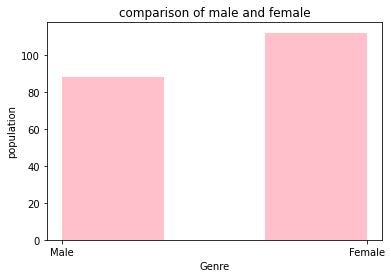

In [ ]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Genre, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Genre')
plt.ylabel('population')
plt.show()

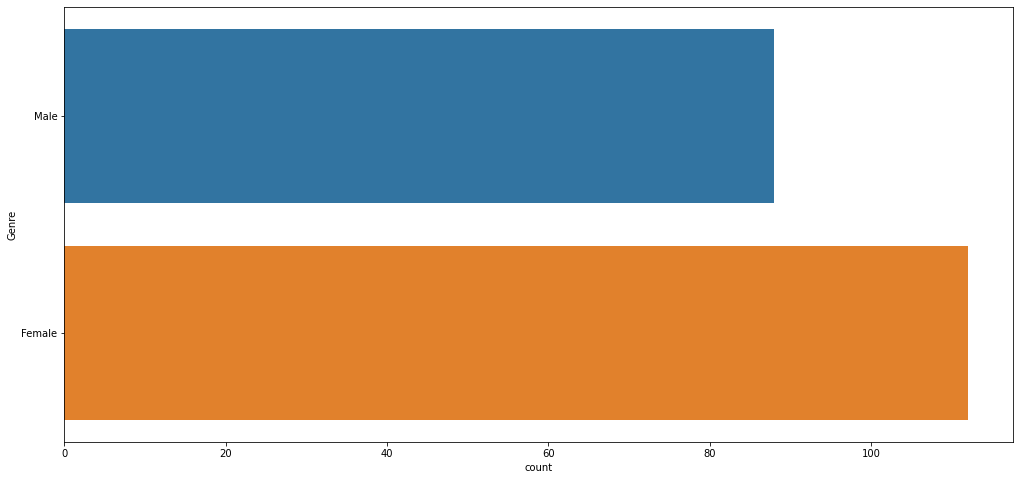

In [ ]:
plt.figure(1 , figsize = (17 , 8))
sns.countplot(y = 'Genre' , data = data)
plt.show()

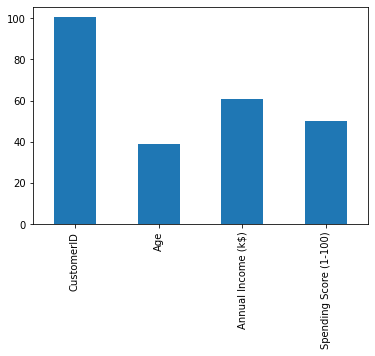

In [ ]:
data.describe().loc['mean'].plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

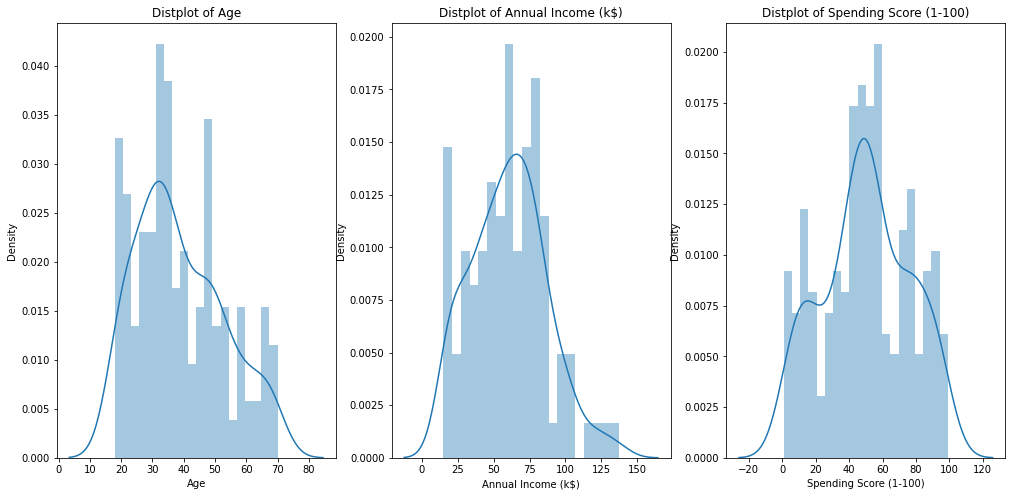

In [ ]:


plt.figure(1 , figsize = (17 , 8))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [ ]:
data['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

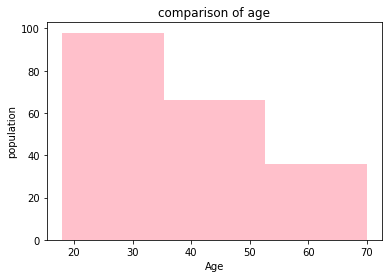

In [ ]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Age, bins = 3, color = 'pink')
plt.title('comparison of age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [ ]:
data['Annual Income (k$)'].value_counts()

54     12
78     12
60      6
87      6
62      6
       ..
61      2
126     2
59      2
58      2
15      2
Name: Annual Income (k$), Length: 64, dtype: int64

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
#Let's predict the x
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print(y_kmeans)
#We convert our prediction to dataframe so we can easily see this prediction in table form
df_pred = pd.DataFrame(y_kmeans)
df_pred.head()

[7 0 4 0 7 0 4 0 4 0 4 0 4 0 4 0 7 0 7 0 7 0 4 0 4 0 7 0 7 0 4 0 4 0 4 0 4
 0 7 0 7 0 7 8 7 8 8 8 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 1 8 8 1 1 8 8 8 8 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 6 1 2 5 6 5 6 1 6 5 2 5 6 5 6 5 2 1 2 5 2 1 6
 5 2 5 2 5 6 5 2 5 6 5 6 1 2 5 2 5 6 5 2 5 6 5 6 5 2 5 2 5 6 5 2 3 9 3 9 3
 9 3 9 3 9 3 9 3 9 3 9 3 9 3 9]


,0
0,7
1,0
2,4
3,0
4,7


Now that we are all set on the data front, it is time to start with our clustering. Before we run our clustering algorithm, it is imperative to determine the number of clusters to divide our customers into. There are a few different methods of determining the ideal number of clusters for this dataset. For that, we will be using the **elbow method.** 

---



**Elbow method**

---


One method to figure out the number of clusters is by using the elbow method. This method involves running the K-means clustering algorithm on the data for different values of K and calculating the Sum of Squared Errors (S.S.E.) for each value of K.
Then, these values are plotted on a graph, and we can see that S.S.E. tends to decrease as the value of K increases. S.S.E. becomes 0 when the values of K is equal to the number of data points, because then each data point is its own cluster. Our aim is to find a point with a small value of K and that has a low S.S.E.
In this experiment, we will run K-means for different values of K in the range of 0 to 10 and store the S.S.E. in a list called distortions.

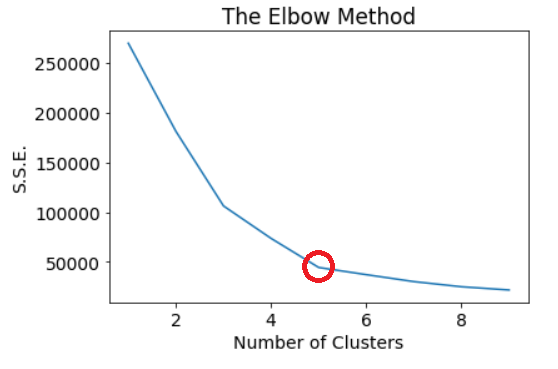

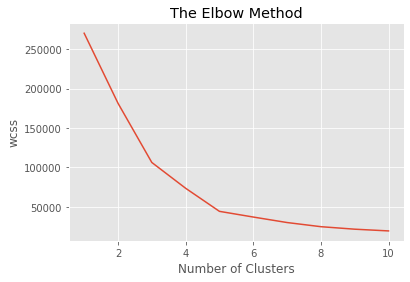

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss') #Within-Cluster-Sum-of-Squares 
plt.show()


**In this graph,** you can observe that the S.S.E. steeply drops after every iteration of K. 
---


You can also observe that after **K reaches 5**, it is one downhill slope from there. So, 5 seems to be an optimum value for K, and this means that we will be dividing the customers into 5 clusters.
Now that we have figured out the number of clusters we can go ahead and create these clusters.

---



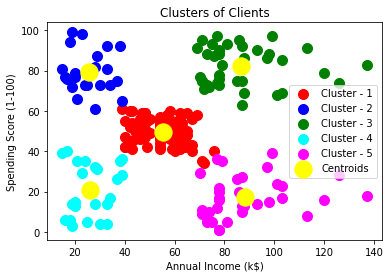

In [ ]:
# Applying k-means to the mall dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s = 100, c = 'red', label = 'Cluster - 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s = 100, c = 'blue', label = 'Cluster - 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s = 100, c = 'green', label = 'Cluster - 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s = 100, c = 'cyan', label = 'Cluster - 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s = 100, c = 'magenta', label = 'Cluster - 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c='yellow', label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
print(y_kmeans)
#We convert our prediction to dataframe so we can easily see this prediction in table form
df_pred = pd.DataFrame(y_kmeans)
df_pred.head()

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


,0
0,3
1,1
2,3
3,1
4,3


it's our prediction means
0 number customer belongs to 3 number cluster
1 number customer belongs to 1 number cluster

---



Since the dataset was small, all these processes take no time to finish. Once the clusters are created, we can plot them on a graph. Each cluster point is marked using a different sign, and the centroids of each cluster are marked using solid red dots. 

---



Just looking at the graph tells us about the five different types of customers that frequent the mall. If we were to name them, then they could be named as follows:

i. Low income, High spenders (Red).

ii. Low income, Low Spenders (Blue).

iii. Average income, average expenditure(Orange).

iv. High income, High spenders, and(Green)

v. High income, Low spenders(Purple).

---




**Conclusion**
Understanding a business’s customer base is of utmost importance. One of the ways to gain deeper insight into customer behaviour is by segmenting them into different buckets based on their behaviour (income and expenditure in this experiment.) Similar people tend to behave similarly, and this is the crux of customer segmentation. Therefore, by planning all the sales and marketing activities around these buckets, it would promise a higher return on investment and enjoyable customer experience.

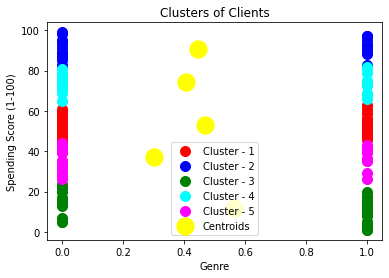

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [1,4]].values
X
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
# print(X)

# Applying k-means to the mall dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s = 100, c = 'red', label = 'Cluster - 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s = 100, c = 'blue', label = 'Cluster - 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s = 100, c = 'green', label = 'Cluster - 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s = 100, c = 'cyan', label = 'Cluster - 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s = 100, c = 'magenta', label = 'Cluster - 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c='yellow', label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Genre')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()